# Import Data

In [102]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [103]:
from google.colab import drive
drive.mount ('/content/drive')

import os
os.chdir ('/content/drive/MyDrive/Project Data Science/Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning')

# import dataset
df = pd.read_csv('marketing_campaign_data.csv', index_col=0) #mengambil kolom dengan index 0 menjadi index table
pd.set_option('display.max_columns', None)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [104]:
# cek kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [105]:
#extract feature Dt_Customers and drop features Dt_Customers
df['dt_years'] = df['Dt_Customer'].apply(lambda x : x.split('-')[2])
df['dt_months'] = df['Dt_Customer'].apply(lambda x : x.split('-')[1])
df['dt_dates'] = df['Dt_Customer'].apply(lambda x : x.split('-')[0])
dt_extract = ['dt_years', 'dt_months', 'dt_dates']
df[dt_extract] = df[dt_extract].astype(int)
df.drop('Dt_Customer', axis=1 , inplace=True)

# Preprocessing

In [106]:
#cek missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dt_years                0
dt_months               0
dt_dates                0
dtype: int64

In [107]:
#drop kolom (karna jml data nilai null ~1%)
df = df.dropna()

In [108]:
df.drop(columns='ID',inplace=True) #drop column 'ID' karena kolom unique, dimana jika kita membuat modelling akan mengganggu performance dari model (machine learning)
if df.duplicated().sum()==0: print('tidak ada data duplicated')
else : print(f'terdapat data duplicated sebanyak :',df.duplicated().sum())

terdapat data duplicated sebanyak : 183


In [109]:
#drop kolom duplicates
df = df.drop_duplicates()
if df.duplicated().sum()==0: print('tidak ada data duplicated')
else : print(f'terdapat data duplicated sebanyak :',df.duplicated().sum())

tidak ada data duplicated


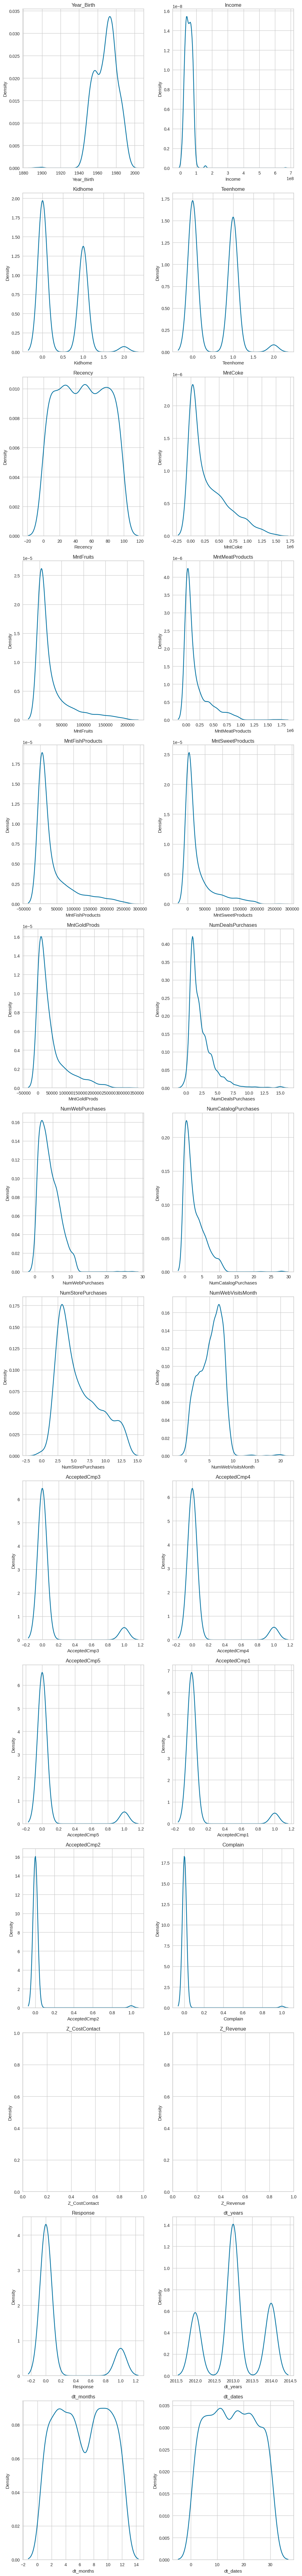

In [110]:
#cek distribution data each feature
cek = df.select_dtypes(exclude='object')
col = cek.columns

num_plots = len(col)
num_cols = 2
num_rows = (num_plots + 1) // 2 #memastikan hasil pembagian bisa num_plot bilangan ganjil diluatkan ke atas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6*num_rows), tight_layout=True)

for i, column in enumerate(col):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.kdeplot(data=df[column], ax=ax)
    ax.set_title(column)

plt.show()

In [111]:
#handle outlier with z-score
from scipy import stats

print(f'total data before handling outlier :', df.shape[0])

# Select numerical columns
df_num = df.select_dtypes(exclude='object')

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_num))

# Set threshold
threshold = 3

# Identify outlier rows
outlier_rows = np.where(z_scores > threshold)[0]

# Remove outlier rows
df = df.drop(df.index[outlier_rows])

print(f'total data after handling outlier :', df.shape[0])

total data before handling outlier : 2033
total data after handling outlier : 1436


In [112]:
#handle outlier with IQR
#df_num = df.select_dtypes(exclude='object')
#num_col = df_num.columns

#column_list = []

#for i in num_col:
#    Q1 = df[i].quantile(0.25)
#    Q3 = df[i].quantile(0.75)
#    IQR = Q3 - Q1
#    outliers = ((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))
#    outlier_rows = outliers  # Mengidentifikasi baris yang mengandung outlier
    #print(f"Column: {i}, Outliers: {outliers}")
    #print(f"Column: {i}, Outlier Rows: {outlier_rows}")
#    df = df.loc[~outlier_rows]  # Menghapus baris yang mengandung outlier

In [113]:
#StandardScaler (mean = 0, std = 1), biasa dilakukan untuk data yang postively skewed (mean > median)
#from sklearn.preprocessing import StandardScaler

#df_num = df.select_dtypes(exclude='object')
#num_col = df_num.columns

#ss = StandardScaler()

#for i in num_col :
#    df[i] = ss.fit_transform(df[i].values.reshape(-1,1))

In [114]:
#MinMaxScaler (transfrom value to min = 0, max = 1)
#from sklearn.preprocessing import MinMaxScaler

#mm = MinMaxScaler()

#for i in num_col :
#    df[i] = ss.fit_transform(df[i].values.reshape(-1,1))

In [115]:
#cek data categorical
display(df['Education'].value_counts())
display(df['Marital_Status'].value_counts())

S1     708
S3     311
S2     243
D3     131
SMA     43
Name: Education, dtype: int64

Menikah        558
Bertunangan    372
Lajang         302
Cerai          157
Janda           45
Duda             2
Name: Marital_Status, dtype: int64

In [116]:
#add label encoding to data type 'object'
from sklearn.preprocessing import LabelEncoder #library for encoding
le = LabelEncoder()

columns = df.select_dtypes(include='object').columns

for i in columns:
    df[i] = le.fit_transform(df[i])

In [117]:
#cek data categorical
display(df['Education'].value_counts())
display(df['Marital_Status'].value_counts())

1    708
3    311
2    243
0    131
4     43
Name: Education, dtype: int64

5    558
0    372
4    302
1    157
3     45
2      2
Name: Marital_Status, dtype: int64

Feature 'Education' :
<br>S1 = 1
<br>S3 = 3
<br>S2 = 2
<br>D3 = 0
<br>SMA = 4

Feature 'Marital Status' :
<br>Menikah = 5
<br>Bertunangan = 0
<br>Lajang = 4
<br>Cerai = 1
<br>Janda = 3
<br>Duda = 2    

# Modeling

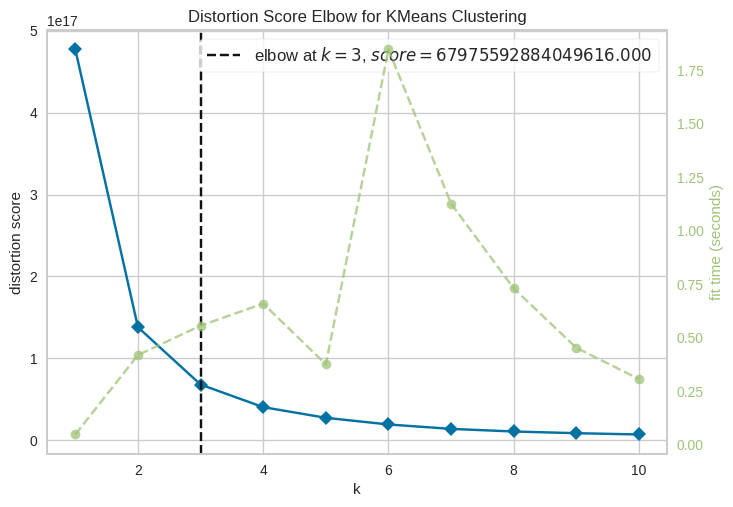

Best cluster value : 3


In [118]:
#model using elbow test
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=0)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(df)  # Fit the data to the visualizer
visualizer.show()

# Get the best cluster value
best_cluster = visualizer.elbow_value_

# Print the best cluster value
print("Best cluster value :", best_cluster)

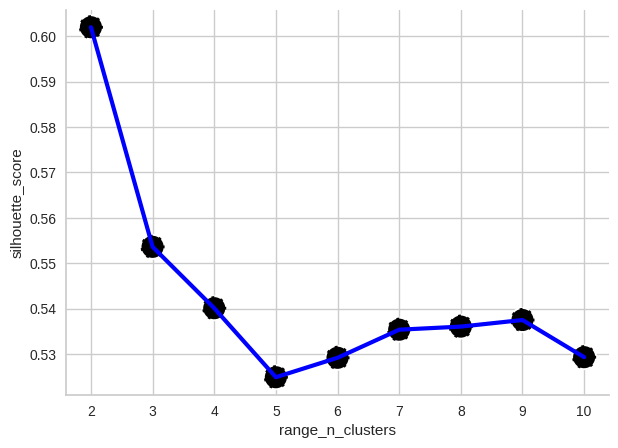

In [119]:
#model using silhoutte score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list(range(2,11)) #range cluster disini hanya bisa dimulai dari 2
#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
arr_silhouette_score_euclidean = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(df)
    predicted_labels = kmeans.predict(df)

    score_euclidean = silhouette_score(df, predicted_labels, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

#plot silhouette score
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='blue', linewidth=3) #plot untuk garis
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='black', linestyle='--') #plot untuk titik
sns.despine()
plt.xlabel('range_n_clusters')
plt.ylabel('silhouette_score')
plt.show()

In [120]:
max_score = max(arr_silhouette_score_euclidean)
max_index = arr_silhouette_score_euclidean.index(max_score)
optimal_cluster_value = range_n_clusters[max_index]

print("Maximum silhouette score :", max_score)
print("Corresponding number of clusters :", optimal_cluster_value)

Maximum silhouette score : 0.6019494549376182
Corresponding number of clusters : 2


In [121]:
#membuat feature baru untuk cluster pada df
kmeans = KMeans(n_clusters=optimal_cluster_value, random_state=42).fit(df) #pemilihan cluster berdasarkan hasil metrics silhoutte score
clusters = kmeans.labels_ #memberi label cluster pada tiap row
df['cluster'] = clusters #memasukan label dari clustering KMeans

In [122]:
#membuat PCA (Principal Component Analysis)
from sklearn.decomposition import PCA #reduksi feature pada kolom DataFrame tanpa menghilangkan informasi sebelumnya

pca = PCA(n_components=5) #kolom PC yang paling banyak mengandung informasi dari data adalah PC1, dilanjut sampai ke PC-n
pca.fit(df)
pcs = pca.transform(df)
final_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2','PC3', 'PC4', 'PC5'])
final_pca['clusters'] = clusters #value cluster pada df dengan pca sama, karena pada dasarnya value pada 1 baris di pca menginterpretasikan data pada 1 baris di df dengan feature yang sudah di reduksi menjadi lebih sederhana
final_pca.head()

,PC1,PC2,PC3,PC4,PC5,clusters
0,1.168541e+07,407610.000866,284600.480646,62240.186376,-66086.583371,1
1,-1.178007e+05,-217944.786315,-49205.205910,-19390.970545,3478.862213,0
2,2.515455e+07,-71926.505960,-112010.879304,36117.681161,-54345.276372,1
3,-1.981428e+07,14109.541355,27988.702242,-8136.823122,-9622.447538,0
4,1.183278e+07,-166260.628167,-16102.028554,-673.328159,-27168.221785,1


In [123]:
print('total data each cluster :')
final_pca['clusters'].value_counts()

total data each cluster :


0    787
1    649
Name: clusters, dtype: int64

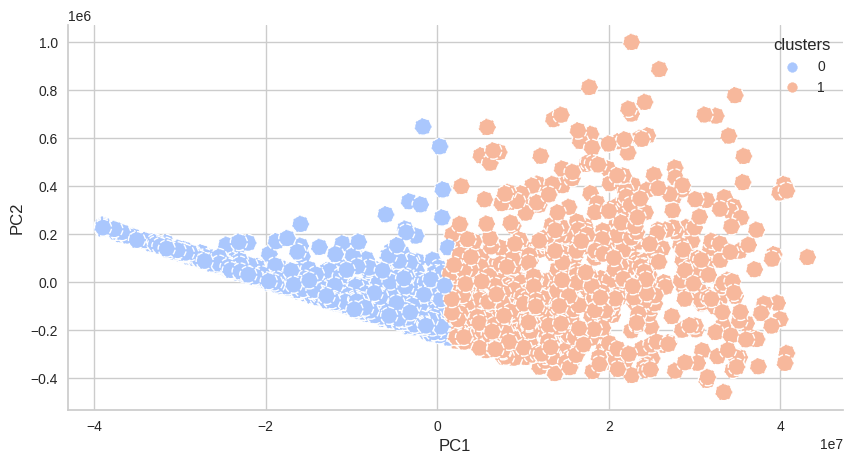

In [124]:
#plotting 2D
fix, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=final_pca, x='PC1', y='PC2', hue='clusters', s=150, palette='coolwarm', linestyle='--', ax=ax) #menggunakan 'PC1' dan 'PC2' karena feature ini yang paling banyak memiliki informasi dari data sebelumnya
sns.despine()
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.show()

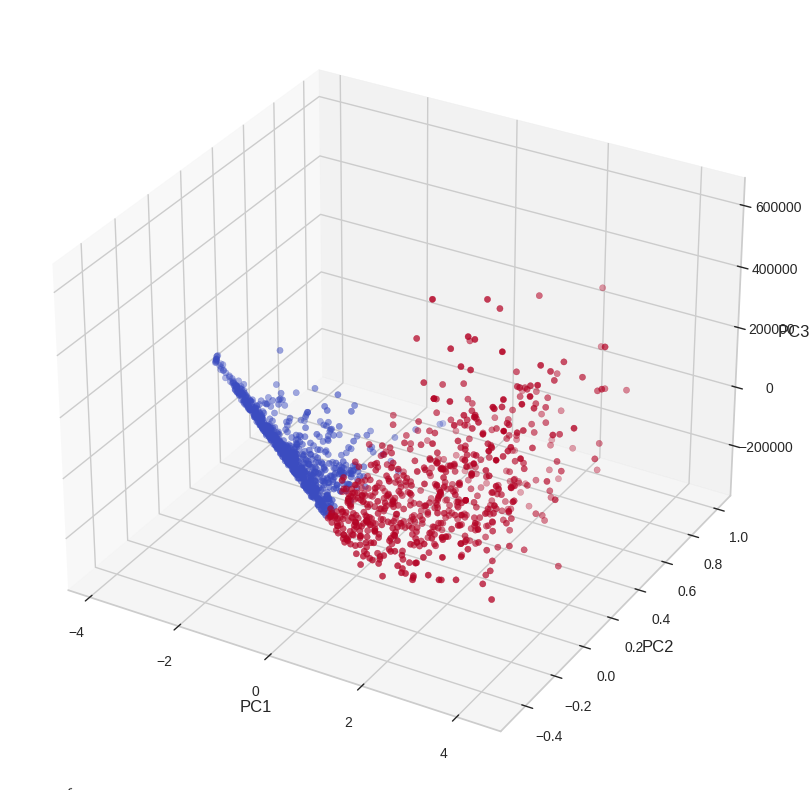

In [125]:
#plotting 3D
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, z, hue):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=hue, cmap='coolwarm')

    ax.set_xlabel('PC1', fontsize=12)
    ax.set_ylabel('PC2', fontsize=12)
    ax.set_zlabel('PC3', fontsize=12)

    plt.show()

plot_3d(final_pca['PC1'], final_pca['PC2'], final_pca['PC3'], hue=final_pca['clusters'])

# Conclusion

In [126]:
#return value label encode
df['Education'].replace({0:'D3', 1:'S1', 2:'S2', 3:'S3', 4:'SMA'}, inplace=True)
df['Marital_Status'].replace({0:'Bertunangan', 1:'Cerai', 2:'Duda', 3:'Janda', 4:'Lajang', 5:'Menikah'}, inplace=True)

#make feature base on EDA
df['total_spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['age'] = df['dt_years'] - df['Year_Birth']

#make category based on age
df['age_category'] = df['age'].apply(lambda x : 'Middle Ages' if x < 40 else ('Adults' if x < 60 else 'Elders'))

#make category based on income
df['incomes_category'] = df['Income'].apply(lambda x : 'low' if x < 51000000 else ('mid' if x < 68000000 else 'high'))

#make category based on total_spending
df['total_spending_category'] = df['total_spending'].apply(lambda x :'low' if x < 395000 else ('mid' if x < 1040000 else 'high'))

#replace value cluster
df['cluster'].replace({0:1, 1:2}, inplace=True)
#df['cluster'].replace({0:1, 1:2, 2:3}, inplace=True)

#make data each cluster
cluster_1 = df[df['cluster']==1]
cluster_2 = df[df['cluster']==2]
#cluster_3 = df[df['cluster']==3]

#cek data each cluster
print(f'total data cluster 1 =', cluster_1.shape[0])
print(f'total data cluster 2 =', cluster_2.shape[0])
#print(f'total data cluster 3 =', cluster_3.shape[0])

total data cluster 1 = 787
total data cluster 2 = 649


### By Age Category

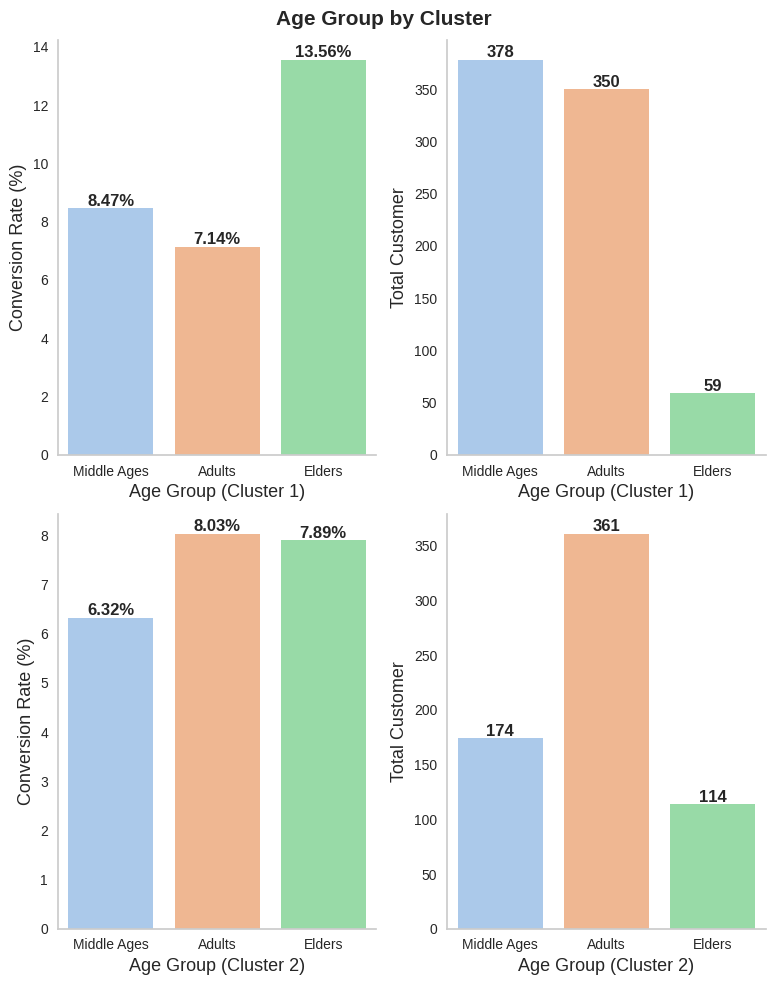

In [127]:
#agg cluster_1 for age
cluster_1_response = cluster_1.groupby(['age_category', 'Response'])['Education'].count().unstack().reset_index()
cluster_1_response['conversion_rate'] = (cluster_1_response[1] / (cluster_1_response[0] + cluster_1_response[1])) * 100
cluster_1_response['conversion_rate'] = cluster_1_response['conversion_rate'].round(3)
cluster_1_response['total_customer'] = cluster_1_response[0] + cluster_1_response[1]
cluster_1_response['ratio_total_customer'] = (cluster_1_response['total_customer'] / (cluster_1_response['total_customer'].sum())) * 100
cluster_1_response['ratio_total_customer'] = cluster_1_response['ratio_total_customer'].round(3)
c1g_age = cluster_1_response.rename(columns={1: 'total_response', 0:'total_not_response'})
c1g_age['age_category'] = pd.Categorical(c1g_age['age_category'], categories=['Middle Ages', 'Adults', 'Elders'])
c1g_age = c1g_age.sort_values('age_category', ascending=True)

#agg cluster_2 for age
cluster_2_response = cluster_2.groupby(['age_category', 'Response'])['Education'].count().unstack().reset_index()
cluster_2_response['conversion_rate'] = (cluster_2_response[1] / (cluster_2_response[0] + cluster_2_response[1])) * 100
cluster_2_response['conversion_rate'] = cluster_2_response['conversion_rate'].round(3)
cluster_2_response['total_customer'] = cluster_2_response[0] + cluster_2_response[1]
cluster_2_response['ratio_total_customer'] = (cluster_2_response['total_customer'] / (cluster_2_response['total_customer'].sum())) * 100
cluster_2_response['ratio_total_customer'] = cluster_2_response['ratio_total_customer'].round(3)
c2g_age = cluster_2_response.rename(columns={1: 'total_response', 0:'total_not_response'})
c2g_age['age_category'] = pd.Categorical(c2g_age['age_category'], categories=['Middle Ages', 'Adults', 'Elders'])
c2g_age = c2g_age.sort_values('age_category', ascending=True)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(8, 10))
ax[0,0].grid(False)  # Menghapus grid pada subplot pertama
ax[0,1].grid(False)  # Menghapus grid pada subplot pertama
ax[1,0].grid(False)  # Menghapus grid pada subplot kedua
ax[1,1].grid(False)  # Menghapus grid pada subplot kedua

sns.barplot(data=c1g_age, x='age_category', y='conversion_rate', ax=ax[0,0], palette='pastel')
sns.barplot(data=c1g_age, x='age_category', y='total_customer', ax=ax[0,1], palette='pastel')
sns.barplot(data=c2g_age, x='age_category', y='conversion_rate', ax=ax[1,0], palette='pastel')
sns.barplot(data=c2g_age, x='age_category', y='total_customer', ax=ax[1,1], palette='pastel')

sns.despine()

# Penyesuaian ruang antara subplot
plt.subplots_adjust(hspace=0.75)  # Mengatur jarak vertikal antara subplot
plt.subplots_adjust(hspace=2.5)  # Mengatur jarak horizontal antara subplot

plt.tight_layout()

# Tambahkan label pada bar (Cluster 1)
for p in ax[0,0].patches:
    value = f"{p.get_height():.2f}%"
    ax[0,0].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')
for p in ax[0,1].patches:
    value = f"{p.get_height():.0f}"
    ax[0,1].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')

# Tambahkan label pada bar (Cluster 2)
for p in ax[1,0].patches:
    value = f"{p.get_height():.2f}%"
    ax[1,0].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')
for p in ax[1,1].patches:
    value = f"{p.get_height():.0f}"
    ax[1,1].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')

# Tambahkan judul dan label sumbu
fig.suptitle('Age Group by Cluster', weight='bold', fontsize=15)
ax[0,0].set_xlabel('Age Group (Cluster 1)', fontsize=13)
ax[0,0].set_ylabel('Conversion Rate (%)', fontsize=13)

ax[0,1].set_xlabel('Age Group (Cluster 1)', fontsize=13)
ax[0,1].set_ylabel('Total Customer', fontsize=13)

ax[1,0].set_xlabel('Age Group (Cluster 2)', fontsize=13)
ax[1,0].set_ylabel('Conversion Rate (%)', fontsize=13)

ax[1,1].set_xlabel('Age Group (Cluster 2)', fontsize=13)
ax[1,1].set_ylabel('Total Customer', fontsize=13)

# Penyesuaian jarak antara judul dan plot
plt.subplots_adjust(top=0.95)

plt.show()

### By Income Category

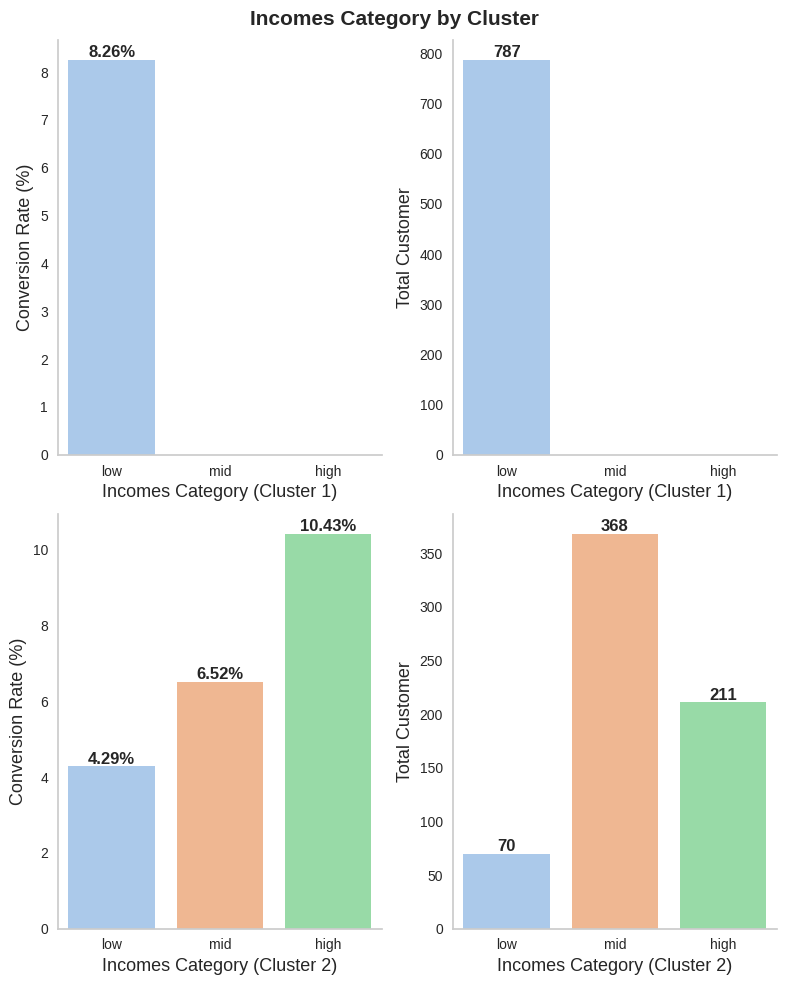

In [128]:
#agg cluster_1 for income
cluster_1_response = cluster_1.groupby(['incomes_category', 'Response'])['Education'].count().unstack().reset_index()
cluster_1_response['conversion_rate'] = (cluster_1_response[1] / (cluster_1_response[0] + cluster_1_response[1])) * 100
cluster_1_response['conversion_rate'] = cluster_1_response['conversion_rate'].round(3)
cluster_1_response['total_customer'] = cluster_1_response[0] + cluster_1_response[1]
cluster_1_response['ratio_total_customer'] = (cluster_1_response['total_customer'] / (cluster_1_response['total_customer'].sum())) * 100
cluster_1_response['ratio_total_customer'] = cluster_1_response['ratio_total_customer'].round(3)
c1g_income = cluster_1_response.rename(columns={1: 'total_response', 0:'total_not_response'})
c1g_income['incomes_category'] = pd.Categorical(c1g_income['incomes_category'], categories=['low', 'mid', 'high'])
c1g_income = c1g_income.sort_values('incomes_category', ascending=True)

#agg cluster_2 for income
cluster_2_response = cluster_2.groupby(['incomes_category', 'Response'])['Education'].count().unstack().reset_index()
cluster_2_response['conversion_rate'] = (cluster_2_response[1] / (cluster_2_response[0] + cluster_2_response[1])) * 100
cluster_2_response['conversion_rate'] = cluster_2_response['conversion_rate'].round(3)
cluster_2_response['total_customer'] = cluster_2_response[0] + cluster_2_response[1]
cluster_2_response['ratio_total_customer'] = (cluster_2_response['total_customer'] / (cluster_2_response['total_customer'].sum())) * 100
cluster_2_response['ratio_total_customer'] = cluster_2_response['ratio_total_customer'].round(3)
c2g_income = cluster_2_response.rename(columns={1: 'total_response', 0:'total_not_response'})
c2g_income['incomes_category'] = pd.Categorical(c2g_income['incomes_category'], categories=['low', 'mid', 'high'])
c2g_income = c2g_income.sort_values('incomes_category', ascending=True)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(8, 10))
ax[0,0].grid(False)  # Menghapus grid pada subplot pertama
ax[0,1].grid(False)  # Menghapus grid pada subplot pertama
ax[1,0].grid(False)  # Menghapus grid pada subplot kedua
ax[1,1].grid(False)  # Menghapus grid pada subplot kedua

sns.barplot(data=c1g_income, x='incomes_category', y='conversion_rate', ax=ax[0,0], palette='pastel')
sns.barplot(data=c1g_income, x='incomes_category', y='total_customer', ax=ax[0,1], palette='pastel')
sns.barplot(data=c2g_income, x='incomes_category', y='conversion_rate', ax=ax[1,0], palette='pastel')
sns.barplot(data=c2g_income, x='incomes_category', y='total_customer', ax=ax[1,1], palette='pastel')

sns.despine()

# Penyesuaian ruang antara subplot
plt.subplots_adjust(hspace=0.75)  # Mengatur jarak vertikal antara subplot
plt.subplots_adjust(hspace=2.5)  # Mengatur jarak horizontal antara subplot

plt.tight_layout()

# Tambahkan label pada bar (Cluster 1)
for p in ax[0,0].patches:
    value = f"{p.get_height():.2f}%"
    ax[0,0].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')
for p in ax[0,1].patches:
    value = f"{p.get_height():.0f}"
    ax[0,1].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')

# Tambahkan label pada bar (Cluster 2)
for p in ax[1,0].patches:
    value = f"{p.get_height():.2f}%"
    ax[1,0].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')
for p in ax[1,1].patches:
    value = f"{p.get_height():.0f}"
    ax[1,1].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')

# Tambahkan judul dan label sumbu
fig.suptitle('Incomes Category by Cluster', weight='bold', fontsize=15)
ax[0,0].set_xlabel('Incomes Category (Cluster 1)', fontsize=13)
ax[0,0].set_ylabel('Conversion Rate (%)', fontsize=13)

ax[0,1].set_xlabel('Incomes Category (Cluster 1)', fontsize=13)
ax[0,1].set_ylabel('Total Customer', fontsize=13)

ax[1,0].set_xlabel('Incomes Category (Cluster 2)', fontsize=13)
ax[1,0].set_ylabel('Conversion Rate (%)', fontsize=13)

ax[1,1].set_xlabel('Incomes Category (Cluster 2)', fontsize=13)
ax[1,1].set_ylabel('Total Customer', fontsize=13)

# Penyesuaian jarak antara judul dan plot
plt.subplots_adjust(top=0.95)

plt.show()

### By Total Spending Category

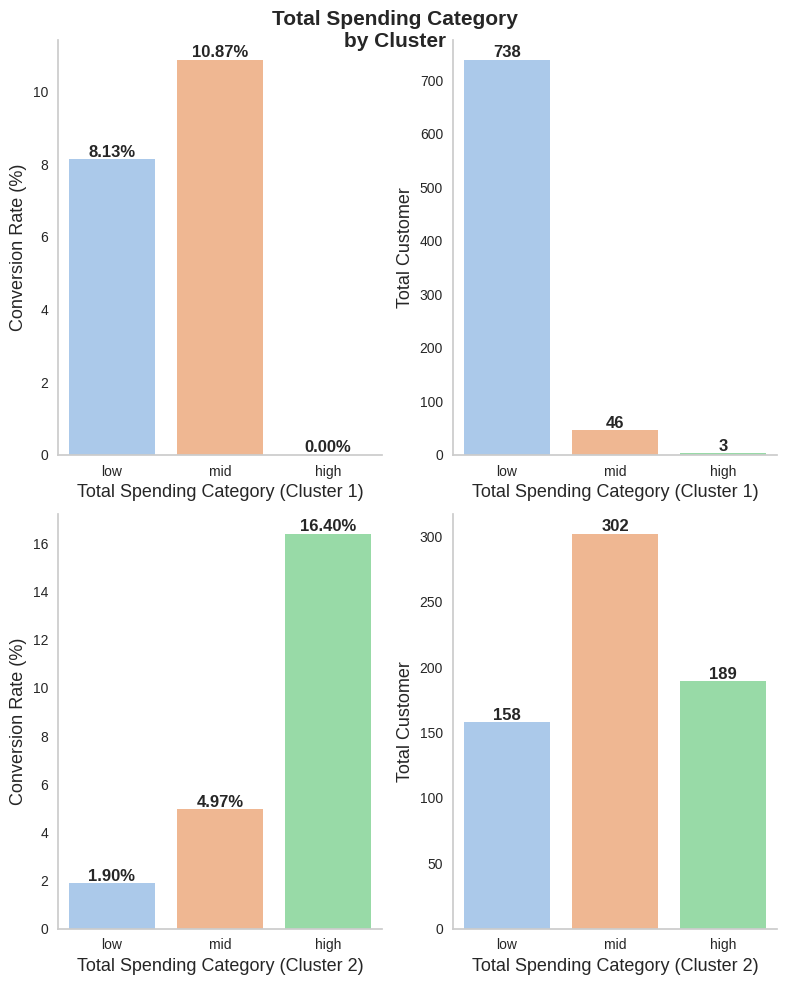

In [129]:
#agg cluster_1 for total spending
cluster_1_response = cluster_1.groupby(['total_spending_category', 'Response'])['Education'].count().unstack().reset_index()
cluster_1_response[1] = cluster_1_response[1].fillna(0)
cluster_1_response['conversion_rate'] = (cluster_1_response[1] / (cluster_1_response[0] + cluster_1_response[1])) * 100
cluster_1_response['conversion_rate'] = cluster_1_response['conversion_rate'].round(3)
cluster_1_response['total_customer'] = cluster_1_response[0] + cluster_1_response[1]
cluster_1_response['ratio_total_customer'] = (cluster_1_response['total_customer'] / (cluster_1_response['total_customer'].sum())) * 100
cluster_1_response['ratio_total_customer'] = cluster_1_response['ratio_total_customer'].round(3)
c1g_total_spending = cluster_1_response.rename(columns={1: 'total_response', 0:'total_not_response'})
c1g_total_spending['total_spending_category'] = pd.Categorical(c1g_total_spending['total_spending_category'], categories=['low', 'mid', 'high'])
c1g_total_spending = c1g_total_spending.sort_values('total_spending_category', ascending=True)

#agg cluster_2 for income
cluster_2_response = cluster_2.groupby(['total_spending_category', 'Response'])['Education'].count().unstack().reset_index()
cluster_2_response['conversion_rate'] = (cluster_2_response[1] / (cluster_2_response[0] + cluster_2_response[1])) * 100
cluster_2_response['conversion_rate'] = cluster_2_response['conversion_rate'].round(3)
cluster_2_response['total_customer'] = cluster_2_response[0] + cluster_2_response[1]
cluster_2_response['ratio_total_customer'] = (cluster_2_response['total_customer'] / (cluster_2_response['total_customer'].sum())) * 100
cluster_2_response['ratio_total_customer'] = cluster_2_response['ratio_total_customer'].round(3)
c2g_total_spending = cluster_2_response.rename(columns={1: 'total_response', 0:'total_not_response'})
c2g_total_spending['total_spending_category'] = pd.Categorical(c2g_total_spending['total_spending_category'], categories=['low', 'mid', 'high'])
c2g_total_spending = c2g_total_spending.sort_values('total_spending_category', ascending=True)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(8, 10))
ax[0,0].grid(False)  # Menghapus grid pada subplot pertama
ax[0,1].grid(False)  # Menghapus grid pada subplot pertama
ax[1,0].grid(False)  # Menghapus grid pada subplot kedua
ax[1,1].grid(False)  # Menghapus grid pada subplot kedua

sns.barplot(data=c1g_total_spending, x='total_spending_category', y='conversion_rate', ax=ax[0,0], palette='pastel')
sns.barplot(data=c1g_total_spending, x='total_spending_category', y='total_customer', ax=ax[0,1], palette='pastel')
sns.barplot(data=c2g_total_spending, x='total_spending_category', y='conversion_rate', ax=ax[1,0], palette='pastel')
sns.barplot(data=c2g_total_spending, x='total_spending_category', y='total_customer', ax=ax[1,1], palette='pastel')

sns.despine()

# Penyesuaian ruang antara subplot
plt.subplots_adjust(hspace=0.75)  # Mengatur jarak vertikal antara subplot
plt.subplots_adjust(hspace=2.5)  # Mengatur jarak horizontal antara subplot

plt.tight_layout()

# Tambahkan label pada bar (Cluster 1)
for p in ax[0,0].patches:
    value = f"{p.get_height():.2f}%"
    ax[0,0].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')
for p in ax[0,1].patches:
    value = f"{p.get_height():.0f}"
    ax[0,1].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')

# Tambahkan label pada bar (Cluster 2)
for p in ax[1,0].patches:
    value = f"{p.get_height():.2f}%"
    ax[1,0].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')
for p in ax[1,1].patches:
    value = f"{p.get_height():.0f}"
    ax[1,1].annotate(value,
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center', xytext=(0, 5),
                   textcoords='offset points', weight='bold')

# Tambahkan judul dan label sumbu
fig.suptitle('Total Spending Category\nby Cluster', weight='bold', fontsize=15)
ax[0,0].set_xlabel('Total Spending Category (Cluster 1)', fontsize=13)
ax[0,0].set_ylabel('Conversion Rate (%)', fontsize=13)

ax[0,1].set_xlabel('Total Spending Category (Cluster 1)', fontsize=13)
ax[0,1].set_ylabel('Total Customer', fontsize=13)

ax[1,0].set_xlabel('Total Spending Category (Cluster 2)', fontsize=13)
ax[1,0].set_ylabel('Conversion Rate (%)', fontsize=13)

ax[1,1].set_xlabel('Total Spending Category (Cluster 2)', fontsize=13)
ax[1,1].set_ylabel('Total Customer', fontsize=13)

# Penyesuaian jarak antara judul dan plot
plt.subplots_adjust(top=0.95)

plt.show()